In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0.]),
 '_edges': array([0., 1.]),
 '_errors': array([0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. Other kwargs are included in the metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num")
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In the terminal, the `__repr__` prints out bin counts and errors.

In [4]:
print((num/den).rebin(3))

[ 0.89 ± 0.46    1.25 ± 0.32    1.60 ± 0.22    1.40 ± 0.14    1.51 ± 0.12
  1.47 ± 0.12    1.56 ± 0.16    1.44 ± 0.20    1.98 ± 0.59    2.26 ± 1.53]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [5]:
num

[ 2.00 ± 1.41    1.00 ± 1.00    2.00 ± 1.41    5.00 ± 2.24    3.00 ± 1.73
 19.00 ± 4.36   19.00 ± 4.36   35.00 ± 5.92   29.00 ± 5.39   42.00 ± 6.48
 43.00 ± 6.56   61.00 ± 7.81   66.00 ± 8.12   87.00 ± 9.33   74.00 ± 8.60
 94.00 ± 9.70   70.00 ± 8.37   63.00 ± 7.94   63.00 ± 7.94   52.00 ± 7.21
 40.00 ± 6.32   43.00 ± 6.56   30.00 ± 5.48   16.00 ± 4.00   16.00 ± 4.00
  9.00 ± 3.00    7.00 ± 2.65    6.00 ± 2.45    1.00 ± 1.00    2.00 ± 1.41]

Or, just explicitly plot it with matplotlib.

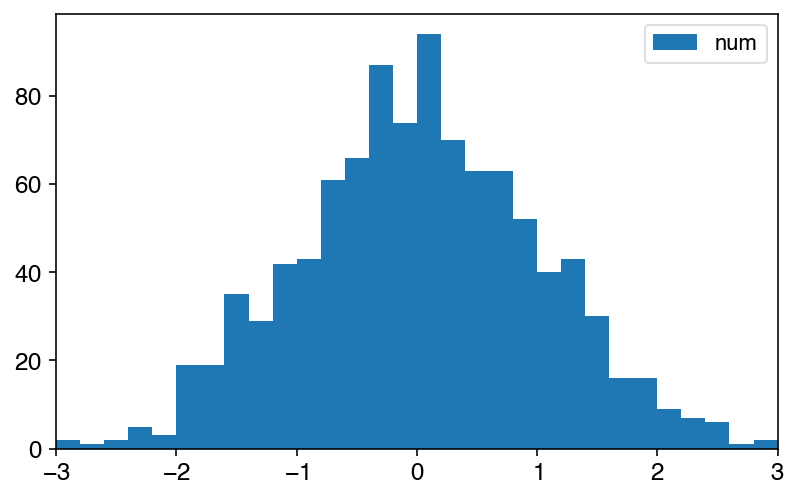

In [6]:
num.plot()

Change the style and show bin counts with some more options.

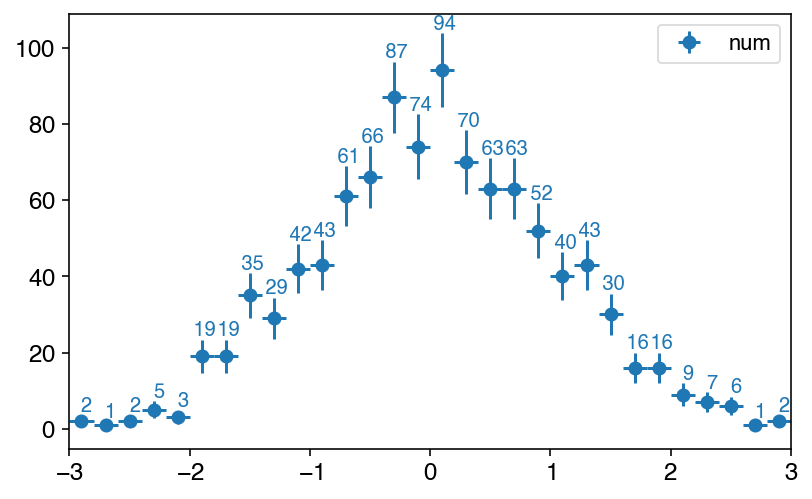

In [7]:
num.plot(show_errors=True,show_counts=True)

Do math with the histograms and merge 3 bins into one

In [8]:
2*(num/den).rebin(3)

[ 1.77 ± 0.92    2.49 ± 0.63    3.21 ± 0.45    2.79 ± 0.28    3.03 ± 0.25
  2.95 ± 0.24    3.12 ± 0.31    2.87 ± 0.40    3.97 ± 1.17    4.51 ± 3.06]

Make a more complicated plot with a ratio panel.

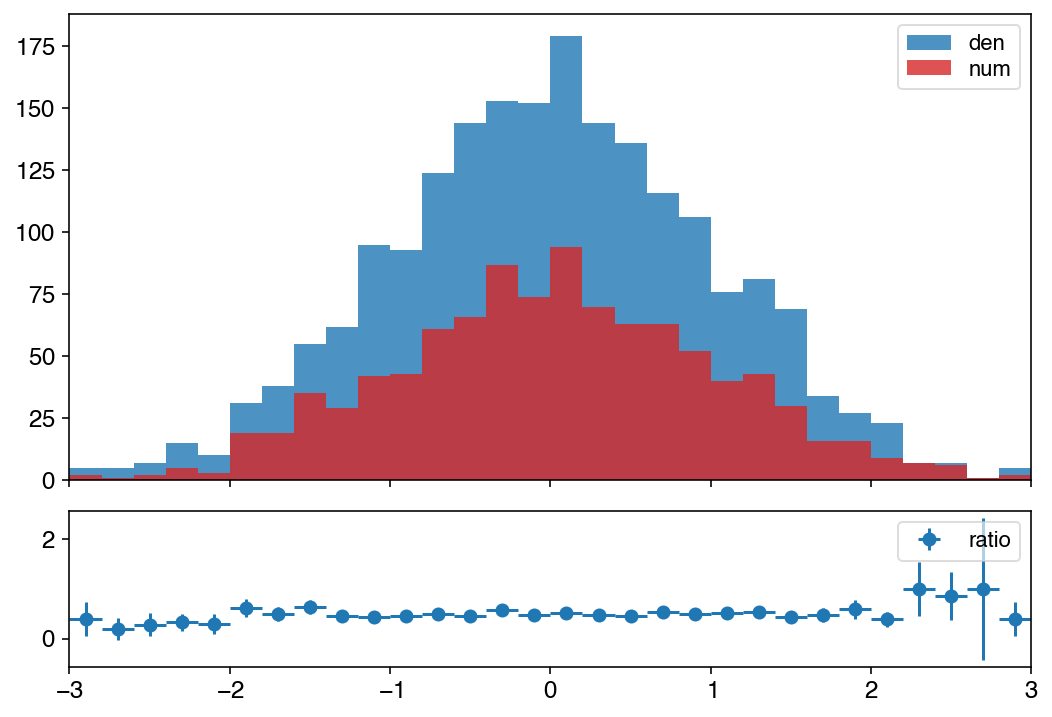

In [9]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True,label="ratio")

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [10]:
num.to_json()

'{"_counts": [2.0, 1.0, 2.0, 5.0, 3.0, 19.0, 19.0, 35.0, 29.0, 42.0, 43.0, 61.0, 66.0, 87.0, 74.0, 94.0, 70.0, 63.0, 63.0, 52.0, 40.0, 43.0, 30.0, 16.0, 16.0, 9.0, 7.0, 6.0, 1.0, 2.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.4142135623730951, 1.0, 1.4142135623730951, 2.23606797749979, 1.7320508075688772, 4.358898943540674, 4.358898943540674, 5.916079783099616, 5.385164807134504, 6.48074069840786, 6.557438524302, 7.810249675906654, 8.12403840463596, 9.327379053088816, 8.602325267042627, 9.695359714832659, 8.366600265340756, 7.937253933193772, 7.937253933193772, 7.211102550927978, 

In [11]:
Hist1D.from_json(num.to_json())

[ 2.00 ± 1.41    1.00 ± 1.00    2.00 ± 1.41    5.00 ± 2.24    3.00 ± 1.73
 19.00 ± 4.36   19.00 ± 4.36   35.00 ± 5.92   29.00 ± 5.39   42.00 ± 6.48
 43.00 ± 6.56   61.00 ± 7.81   66.00 ± 8.12   87.00 ± 9.33   74.00 ± 8.60
 94.00 ± 9.70   70.00 ± 8.37   63.00 ± 7.94   63.00 ± 7.94   52.00 ± 7.21
 40.00 ± 6.32   43.00 ± 6.56   30.00 ± 5.48   16.00 ± 4.00   16.00 ± 4.00
  9.00 ± 3.00    7.00 ± 2.65    6.00 ± 2.45    1.00 ± 1.00    2.00 ± 1.41]

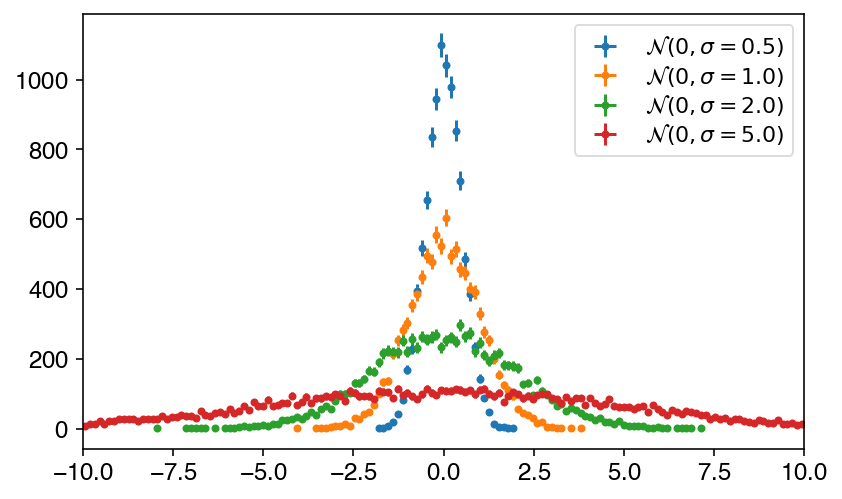

In [12]:
[
    Hist1D(
        np.random.normal(0,sigma,10000),
        bins=np.linspace(-10,10,151),
        label=r"$\mathcal{{N}}(0,\sigma={:.1f})$".format(sigma),
        overflow=False,
    ).plot(show_errors=True,markersize=3.0) for sigma in [0.5,1,2,5]
];

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [13]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    2.00 ± 1.41    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    0.00 ± 0.00]]


Similar to the 1D object, the HTML representation for 2D histograms has a simplified plot but without explicit bin counts. Instead, if the number of bins is not too large, you can hover over the output and see values at the bottom. To keep it simple, only SVG and CSS code is used--no JS.

In [14]:
h

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    2.00 ± 1.41    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    0.00 ± 0.00]]

Or just plot it with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

(<matplotlib.image.AxesImage at 0x114d98be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114d625f8>)

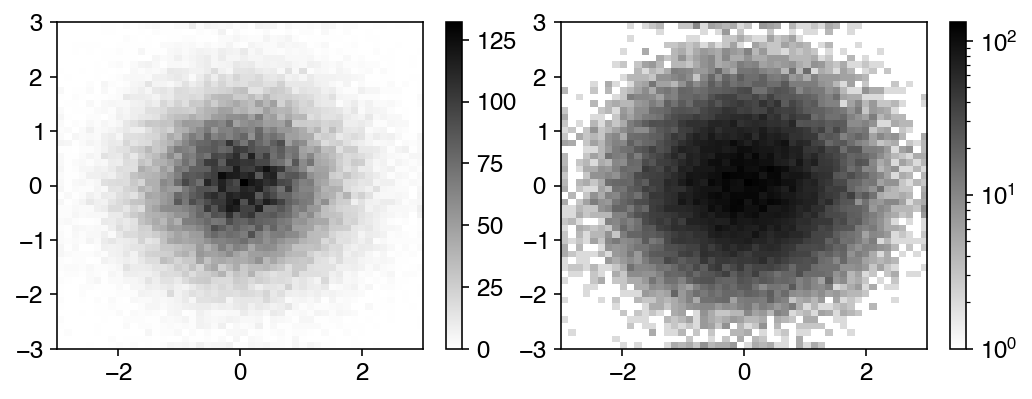

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="binary")
h.plot(ax=ax2, cmap="binary", logz=True)

Chain a few methods together. `projection("x")` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

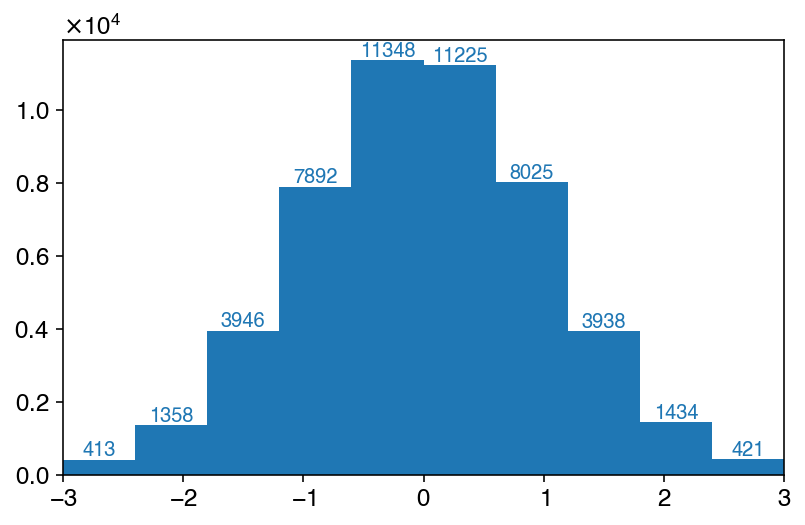

In [16]:
h.rebin(5).projection("x").plot(show_counts=True)

`profile("x")` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

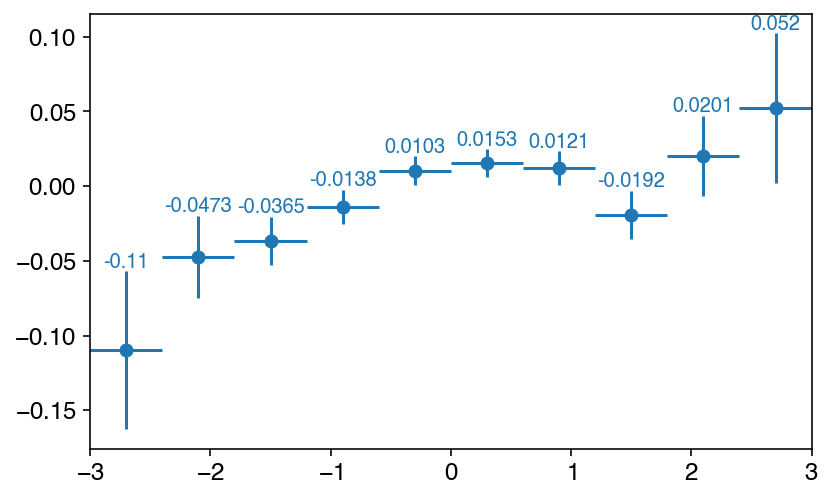

In [17]:
h.rebin(5).profile("x").plot(show_counts=True,show_errors=True, counts_fmt_func="{:.3g}".format)

## Stacking histograms

The `bottom` kwarg of `plt.hist()` allows one to easily stack histograms, so the wrapper code in `utils.plot_stack` is pretty simple.

In [18]:
from yahist.utils import plot_stack
import inspect
print(inspect.getsource(plot_stack))

def plot_stack(hists, **kwargs):
    """
    Plots a list of `Hist1D` objects as a stack

    Parameters
    ----------
    hists : list of `Hist1D` objects
    kwargs : passed to `Hist1D.plot()`
    """
    bottom = 0.0
    for h in hists:
        h.plot(bottom=bottom, **kwargs)
        bottom += h.counts



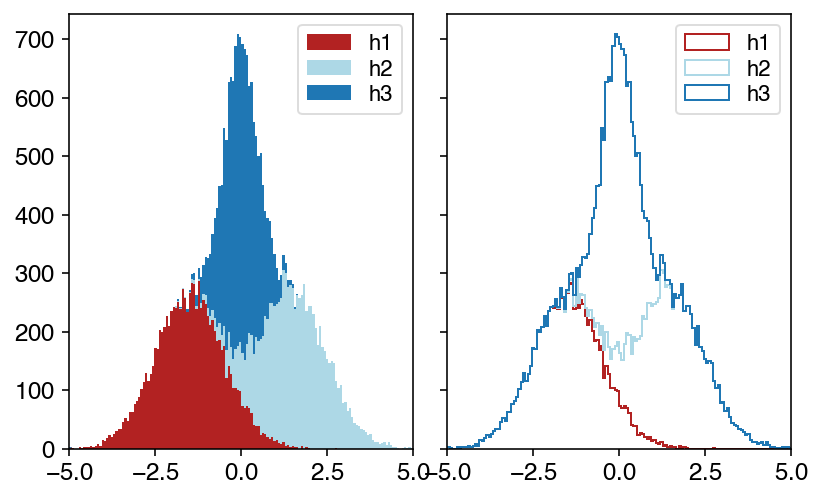

In [19]:
h1 = Hist1D(np.random.normal(-1.5,1,10000), bins="150,-5,5", color="firebrick", label="h1")
h2 = Hist1D(np.random.normal(1.5,1,10000), bins="150,-5,5", color="lightblue", label="h2")
h3 = Hist1D(np.random.normal(0.0,0.5,10000), bins="150,-5,5", label="h3")
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
plot_stack([h1,h2,h3],ax=ax1)
plot_stack([h1,h2,h3],histtype="step",ax=ax2)

## Simple fits

While this is not a fitting package, there is a function for conveniently fitting a user-provided 
function to a histogram, taking into account the histogram errors. The function is a wrapper around `scipy.optimize.curve_fit`.

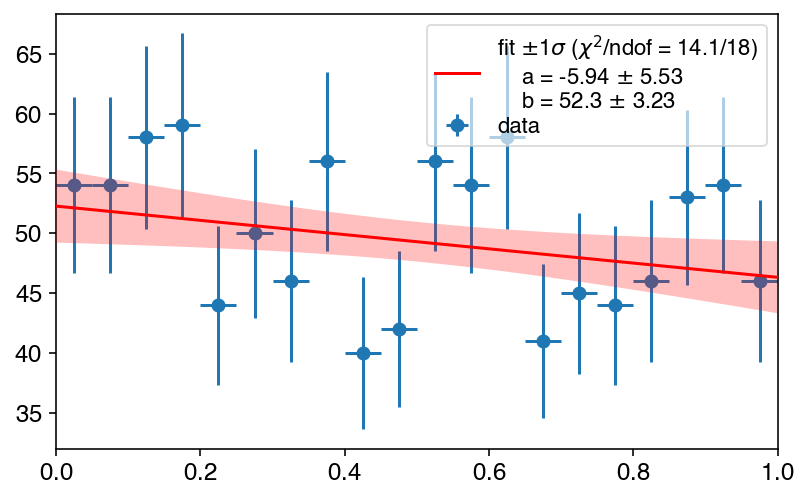

In [20]:
np.random.seed(42)
h = Hist1D(np.random.random(1000), bins="20,0,1")
h.plot(show_errors=True, label="data")
# parses an expression string, assuming the main parameter is `x`
res = h.fit("a*x+b")
# OR h.fit(lambda x,a,b: a*x+b)

Note that `curve_fit` minimizes chi2 by default. To minimize log likelihood, pass the `likelihood=True` option. In the limit of large counts, both are equivalent. Log likelihood is more correct for low counts, especially when some bins are empty.

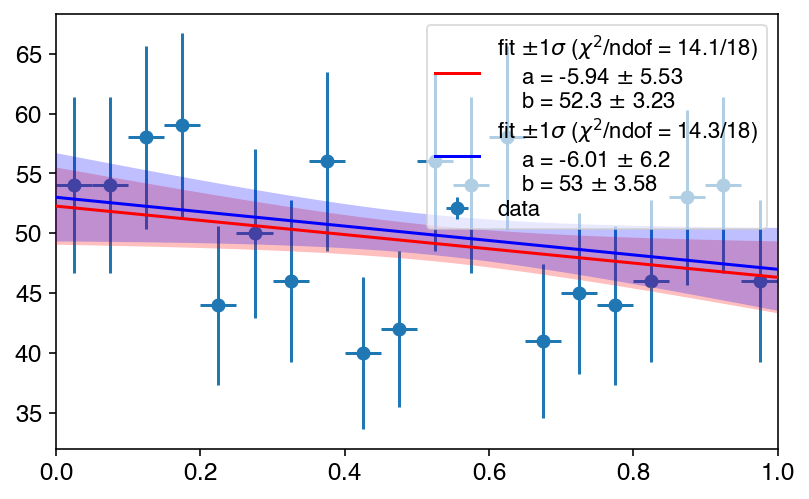

In [21]:
h.plot(show_errors=True, label="data")
res = h.fit("a*x+b", color="r")
res = h.fit("a*x+b", color="b", likelihood=True)

Or a slightly more complicated fit, with a ratio panel...

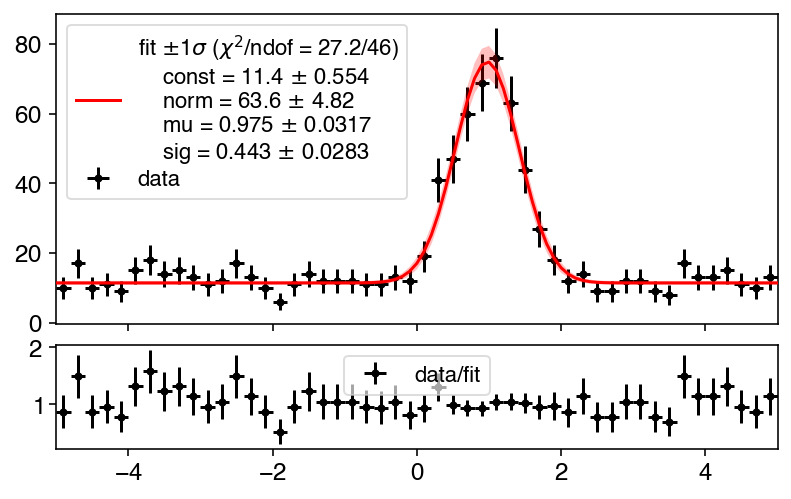

In [22]:
np.random.seed(42)

fig,(ax1,ax2) = plt.subplots(2,sharex=True,gridspec_kw=dict(height_ratios=[3, 1]))

bins = "50,-5,5"
hdata = (Hist1D(np.random.normal(1,0.5,350), bins=bins) 
         + Hist1D(10*np.random.random(600)-5, bins=bins))
hdata.plot(ax=ax1,show_errors=True, color="k",markersize=3,label="data")

result = hdata.fit("const+norm*np.exp(-(x-mu)**2/(2*sig**2))", ax=ax1)

ratio = (hdata/result["hfit"])
ratio.plot(ax=ax2, color="k", label="data/fit", show_errors=True,markersize=3)

The returned `result` object has an HTML representation for notebooks showing the fit parameters. The object itself is a `dict` containing information about the parameters and including a `Hist1D` object of the fit. 

In [23]:
result

parameter,value
const,11.4 ± 0.554
norm,63.57 ± 4.824
mu,0.9748 ± 0.03169
sig,0.4427 ± 0.02828


In [24]:
dict(result)

{'parnames': ('const', 'norm', 'mu', 'sig'),
 'parvalues': array([11.40179986, 63.57346636,  0.97481757,  0.44270051]),
 'parerrors': array([0.55399751, 4.82432105, 0.03169182, 0.02827723]),
 'chi2': 27.177204062645963,
 'ndof': 46,
 'hfit': [11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.41 ± 0.56   11.45 ± 0.55   11.65 ± 0.56   12.41 ± 0.71   14.74 ± 1.28
  20.42 ± 2.21   31.30 ± 3.07   47.17 ± 3.51   63.83 ± 3.98   74.07 ± 4.61
  72.48 ± 4.50   59.94 ± 3.82   42.86 ± 3.39   28.02 ± 2.82   18.56 ± 1.89
  13.92 ± 1.05   12.12 ± 0.63   11.57 ± 0.55   11.43 ± 0.56   11.41 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56]}

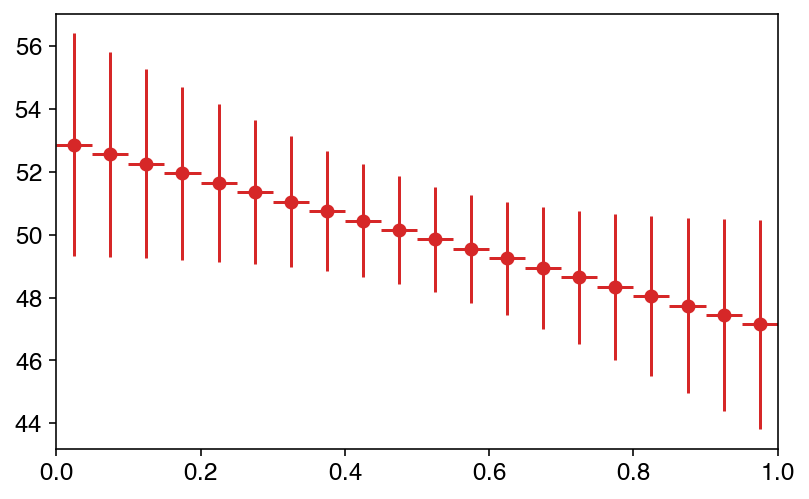

In [25]:
res["hfit"].plot(show_errors=True,color="C3")